# Exploratory Data Analysis

Import packages need and read data from file

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
sns.set_style('whitegrid')

In [6]:
temp = pd.read_pickle('df_of_imdb_data.pkl')

The following code chucks replace empty lists with NaN and extract metascores from dict structures within the dataframe

In [7]:
temp['rating'] = temp['rating'].apply(lambda x: x if type(x) == float else np.nan)

In [8]:
temp['runtimes'] = temp['runtimes'].apply(lambda x: int(x[0]) if type(x[0]) == str else np.nan)

In [9]:
temp['metascore'] = temp['metascore'].apply(lambda x: int(x['data']['metascore']) if 'metascore' in x['data'].keys() else np.nan)

In [10]:
temp.head()

,imdb_id,titles,year,original_air_date,countries,language,genres,certificates,rating,votes,color_info,runtimes,box_office,producers,directors,production_company,distributors,metascore,is_nominee
0,0388130,Initial D: Third Stage,2001,13 Jan 2001 (Japan),[Japan],"[en, ja, cmn]","[Animation, Action, Romance, Sport]","[Australia:PG, Japan:G, United States:TV-PG]",7.6,1390,[Color],100,[],[2246748],"[1245306, 1564830]","[0179653, 0021660, 0099762, 0113955, 0036168]","[0179653, 0053157, 0039940, 0921883]",NaN,0
1,0273772,Don't Make Trouble!,2001,17 Jan 2001 (France),[France],"[fr, ar]","[Animation, Drama, Comedy]",[France:Tous publics],6.6,49,[Color],70,[],"[1007620, 0099748, 0501590, 0851724]","[0002174, 0071117, 0099379, 0181117, 0216816, ...","[0072738, 0069857]",[0038517],NaN,0
2,0243017,Waking Life,2001,07 Mar 2002 (Australia),[United States],[en],"[Animation, Drama, Fantasy]","[Argentina:13, Australia:M, Brazil:Livre, Cana...",7.7,63692,[Color],99,"{'Opening Weekend United States': '$88,977, 21...","[0438210, 0657921, 0782270, 0806189, 0808819, ...",[0000500],"[0028932, 0046530, 0042682, 0054189, 0123642, ...","[0000756, 0028932, 0007180, 0125154, 0067533, ...",83.0,0
3,0291559,Wave Twisters,2001,[],[United States],[en],"[Animation, Adventure, Musical, Sci-Fi]",[United States:Unrated],7.4,551,[Color],46,[],[1029039],"[1000898, 1037263]",[0060259],[],NaN,0
4,0277909,Mutant Aliens,2001,09 Jan 2002 (France),[United States],[en],"[Animation, Comedy, Sci-Fi]","[France:Tous publics, Germany:16, South Korea:...",6.6,1204,[Color],81,"{'Budget': '$200,000 (estimated)'}","[0390350, 0687739]",[0687739],[0077590],"[0068070, 0112126, 0084806]",39.0,0


Import train_test_split and create imdb training and test sets

In [95]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [98]:
imdb_train, imdb_test = train_test_split(temp, test_size=0.2, 
                                         shuffle=True, stratify=temp['is_nominee'], 
                                         random_state=126029)

Start of EDA on train set

In [232]:
imdb_train['countries'].explode().value_counts()

United States     1017
Japan              729
France             184
China              167
United Kingdom     165
                  ... 
Isle of Man          1
Maldives             1
Djibouti             1
Brunei               1
Martinique           1
Name: countries, Length: 103, dtype: int64

In [233]:
imdb_train['directors'].explode().value_counts()

5694753    22
5643041    20
1047180    17
5592581    17
9909259    17
           ..
2929668     1
3508637     1
1204349     1
0396860     1
5181638     1
Name: directors, Length: 3044, dtype: int64

Directors alone may not be a good indicator.  While it appears that there is a significant number of repeat directors there are  3044 directors out of 3901 movies.  

In [234]:
imdb_train['production_company'].explode().value_counts()

0062107    67
0169264    61
0090290    59
0002219    54
0002212    53
           ..
0114123     1
0384091     1
0244390     1
0591034     1
0687307     1
Name: production_company, Length: 3771, dtype: int64

The number of production companies is approximately equal to the number of films. ~1070 production companies produced at least 2 films.

In [254]:
imdb_train['production_company'].explode().value_counts().head(1070)

0062107    67
0169264    61
0090290    59
0002219    54
0002212    53
           ..
0734046     2
0528789     2
0317569     1
0737147     1
0416685     1
Name: production_company, Length: 1070, dtype: int64

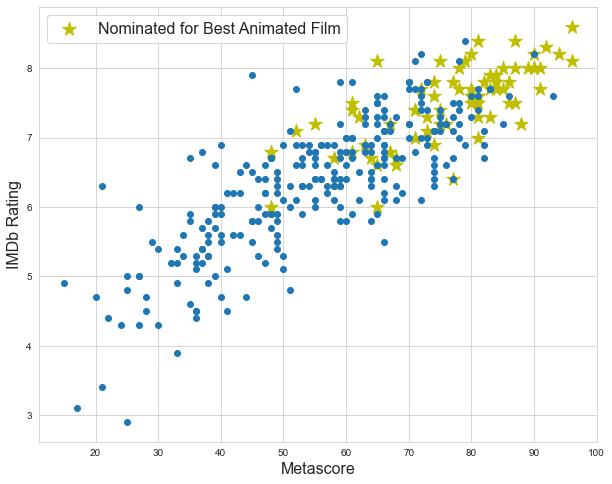

In [144]:
plt.figure(figsize=(10,8))
plt.scatter(imdb_train['metascore'].loc[imdb_train['is_nominee']==1], 
            imdb_train['rating'].loc[imdb_train['is_nominee']==1], 
            color='y', marker='*', s=200, label='Nominated for Best Animated Film')
plt.scatter(imdb_train['metascore'].loc[imdb_train['is_nominee']==0], 
            imdb_train['rating'].loc[imdb_train['is_nominee']==0])
plt.xlabel('Metascore', fontsize=16)
plt.ylabel('IMDb Rating', fontsize=16)
plt.legend(fontsize=16)
plt.show()

In general, it appears that fans and critics share similar beliefs about the quality of a film.

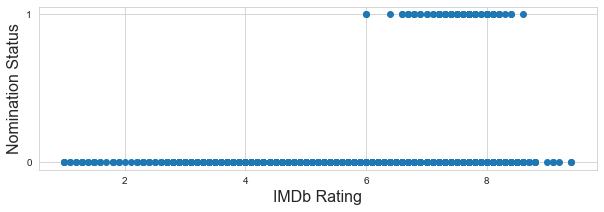

In [271]:
plt.figure(figsize=(10,3))
plt.scatter(imdb_train['rating'], imdb_train['is_nominee'])
plt.xlabel('IMDb Rating', fontsize=16)
plt.ylabel('Nomination Status', fontsize=16)
plt.locator_params(axis='y', nbins=2)
plt.show()

It appears that while it is necessary for a film to meet a minimum level of quatlity to nominated for best animated feature film, it is not sufficient to be nominated.

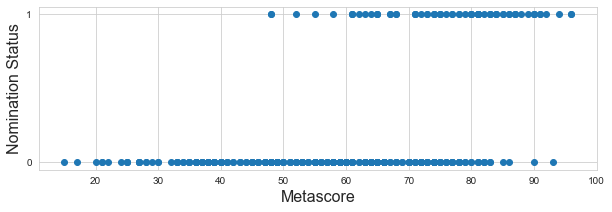

In [270]:
plt.figure(figsize=(10,3))
plt.scatter(imdb_train['metascore'], imdb_train['is_nominee'])
plt.xlabel('Metascore', fontsize=16)
plt.ylabel('Nomination Status', fontsize=16)
plt.locator_params(axis='y', nbins=2)
plt.show()

Metascore shows a bit of separation between nominated films and unnominated films.

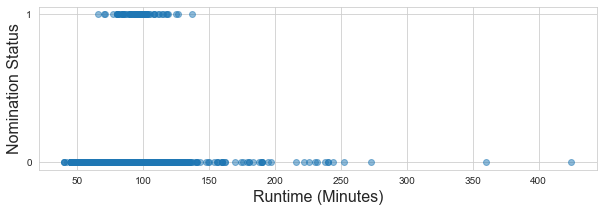

In [269]:
plt.figure(figsize=(10,3))
plt.scatter(imdb_train['runtimes'], imdb_train['is_nominee'], alpha=0.5)
plt.xlabel('Runtime (Minutes)', fontsize=16)
plt.ylabel('Nomination Status', fontsize=16)
plt.locator_params(axis='y', nbins=2)
plt.show()

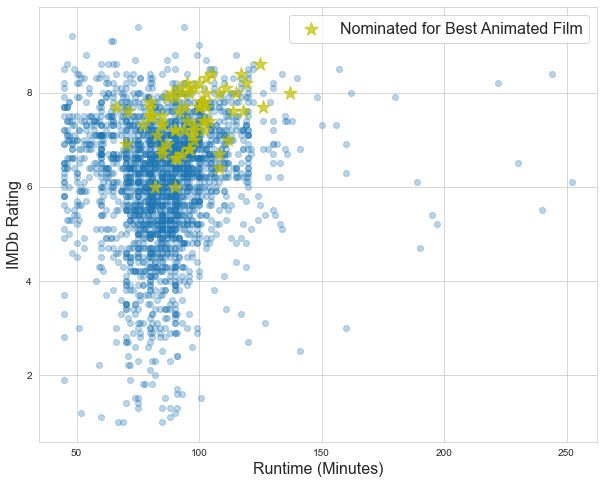

In [255]:
plt.figure(figsize=(10,8))

plt.scatter(imdb_train['runtimes'].loc[imdb_train['is_nominee']==0], 
            imdb_train['rating'].loc[imdb_train['is_nominee']==0], alpha=0.3)

plt.scatter(imdb_train['runtimes'].loc[imdb_train['is_nominee']==1], 
            imdb_train['rating'].loc[imdb_train['is_nominee']==1], 
            color='y', marker='*', s=200, label='Nominated for Best Animated Film',
            alpha=0.7)

plt.xlabel('Runtime (Minutes)', fontsize=16)
plt.ylabel('IMDb Rating', fontsize=16)
plt.legend(fontsize=16)
plt.show()

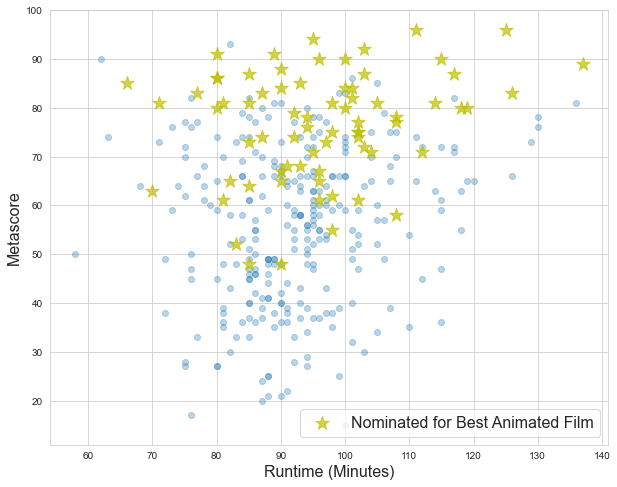

In [257]:
plt.figure(figsize=(10,8))

plt.scatter(imdb_train['runtimes'].loc[imdb_train['is_nominee']==0], 
            imdb_train['metascore'].loc[imdb_train['is_nominee']==0], alpha=0.3)

plt.scatter(imdb_train['runtimes'].loc[imdb_train['is_nominee']==1], 
            imdb_train['metascore'].loc[imdb_train['is_nominee']==1], 
            color='y', marker='*', s=200, label='Nominated for Best Animated Film',
            alpha=0.7)

plt.xlabel('Runtime (Minutes)', fontsize=16)
plt.ylabel('Metascore', fontsize=16)
plt.legend(fontsize=16)
plt.show()

Metascore may be a more useful indicator than imdb rating but only 364 films have a metascore.

In [266]:
imdb_train['metascore'].describe()

count    346.000000
mean      60.023121
std       17.301069
min       15.000000
25%       48.000000
50%       61.000000
75%       74.000000
max       96.000000
Name: metascore, dtype: float64

In [194]:
for director in imdb_train['directors'].loc[(imdb_train['is_nominee']==1) & (imdb_train['year']==2001)].explode():
    print(director)

0011470
0421776
0204884
0594503
0230032
0798899
0881279


In [230]:
x = imdb_train['directors'].explode().value_counts().head(10)
x

5694753     22
5643041     20
1047180     17
5592581     17
9909259     17
10745952    15
0951197     15
5399894     14
4974621     13
9349990     11
Name: directors, dtype: int64

In [214]:
x

0062107    67
0169264    61
0090290    59
0002219    54
0002212    53
0132285    52
0011744    51
0008970    48
0046382    47
0028557    43
Name: production_company, dtype: int64